### Practical No.1(b)

1B. Implement Perceptron learning algorithm for classification of following points {P0(-1,-1,-1) , P1(-
1,-1,1) , P2(-1,1,-1), P3(-1,1,1) ,P4(1,-1,-1) , P5(1,-1,1) , P6(1,1,-1), P7(1,1,1)} in to two classes:
C1={P7 (1,1,1)}
C2={ P0(-1,-1,-1), P1(-1,-1,1) , P2(-1,1,-1) , P3(-1,1,1) ,P4(1,-1,-1), P5(1,-1,1) , P6(1,1,-1) }

In [1]:
import numpy as np

In [2]:
 #dictionary

data_points = {
    'P0':np.array([-1,-1,-1]),
    'P1':np.array([-1,-1, 1]),
    'P2':np.array([-1, 1,-1]),
    'P3':np.array([-1, 1, 1]),
    'P4':np.array([ 1,-1,-1]),
    'P5':np.array([ 1,-1, 1]),
    'P6':np.array([ 1, 1,-1]),
    'P7':np.array([ 1, 1, 1])
}

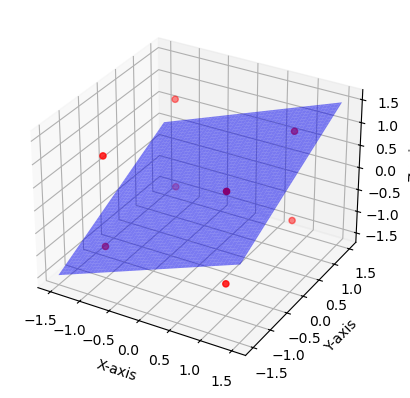

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data points
data_points = {
    'P0': np.array([-1, -1, -1]),
    'P1': np.array([-1, -1, 1]),
    'P2': np.array([-1, 1, -1]),
    'P3': np.array([-1, 1, 1]),
    'P4': np.array([1, -1, -1]),
    'P5': np.array([1, -1, 1]),
    'P6': np.array([1, 1, -1]),
    'P7': np.array([1, 1, 1])
}

# Classes
C1 = ['P7']
C2 = ['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates from data_points
x = [point[0] for point in data_points.values()]
y = [point[1] for point in data_points.values()]
z = [point[2] for point in data_points.values()]

# Plot the points
ax.scatter(x, y, z, c='r', marker='o')

# Plot the line to separate C1 and C2
x_line = np.linspace(-1.5, 1.5, 100)
y_line = np.linspace(-1.5, 1.5, 100)
X_line, Y_line = np.meshgrid(x_line, y_line)
Z_line = 0.5 * X_line + 0.5 * Y_line  # Example plane equation

ax.plot_surface(X_line, Y_line, Z_line, alpha=0.5, color='blue')  # Plane surface

# Set labels for each axis
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()



In [3]:
# Initialize weights and bias
weights = np.zeros(len(data_points['P0']))
bias = 0
#Define the learning rate
learning_rate = 1
epoch =100

[0. 0. 0.]


In [4]:
C1 = ['P7']
C2 = ['P0','P1','P2','P3','P4','P5','P6']

In [6]:
for epoch in range(epoch):
  for point in C2:
    x = data_points[point]
    y = 1 #C2 is the positive class

    #Claculate the prediction
    prediction = np.dot(weights,x)+bias

    #update weights and bias based on the prediction
    if(prediction <=0):
      weights += learning_rate * x
      bias += learning_rate

In [34]:
new_point = np.array([1, 1, 1])
prediction = np.dot(weights,new_point) + bias

In [35]:
# Classify the new point

if(prediction > 0):
  print(f'The new point{new_point} belongs to class C2.')
else:
  print(f'The new point{new_point} belongs to class C1.')

The new point[1 1 1] belongs to class C1.


### proper solution

In [22]:
import numpy as np

def step_function(x):
    return 1 if x >= 0 else -1

def perceptron_learning_algorithm(data_points, learning_rate=1, epochs=1000):
    # Initialize weights and bias
    weights = np.zeros(len(data_points['P0']),dtype=float)
    bias = 0

    for epoch in range(epochs):
        for point, label in data_points.items():
            input_vector = np.array(data_points[point],dtype=float)
            label = 1 if point in C1 else -1

            # Compute the weighted sum
            weighted_sum = np.dot(weights, input_vector) + bias

            # Apply step function to determine the predicted class
            prediction = step_function(weighted_sum)

            # Update weights and bias if misclassified
            if prediction != label:
                weights += learning_rate * label * input_vector
                bias += learning_rate * label

    return weights, bias

# Data points
data_points = {
    'P0': np.array([-1, -1, -1]),
    'P1': np.array([-1, -1, 1]),
    'P2': np.array([-1, 1, -1]),
    'P3': np.array([-1, 1, 1]),
    'P4': np.array([1, -1, -1]),
    'P5': np.array([1, -1, 1]),
    'P6': np.array([1, 1, -1]),
    'P7': np.array([1, 1, 1])
}

# Classes
C1 = {'P7'}
C2 = {'P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6'}

# Run perceptron learning algorithm
weights, bias = perceptron_learning_algorithm(data_points)

# Print the learned weights and bias
print("Learned Weights:", weights)
print("Learned Bias:", bias)


Learned Weights: [1. 1. 1.]
Learned Bias: -3


In [32]:
new_point = np.array([-1, 1, 1])
prediction = np.dot(weights,new_point) + bias

In [33]:
if(prediction >= 0):
  print(f'The new point{new_point} belongs to class C1.')
else:
  print(f'The new point{new_point} belongs to class C2.')

The new point[-1  1  1] belongs to class C2.


Certainly! Let's go through the code line by line, explaining each part and its purpose:


> import numpy as np

- This line imports the NumPy library, which is used for numerical operations and array manipulations.


> def step_function(x):
    return 1 if x >= 0 else -1

- This defines a step function. The step function is a simple activation function commonly used in perceptrons. It returns 1 if the input is greater than or equal to 0, and -1 otherwise.


> def perceptron_learning_algorithm(data_points, learning_rate=1, epochs=1000):

- This defines a function `perceptron_learning_algorithm` that takes data points as input along with optional parameters `learning_rate` and `epochs` with default values.


>    weights = np.zeros(len(data_points['P0']))
    bias = 0

- This initializes the weights and bias. The weights are initialized as an array of zeros with the same dimension as a data point. The bias is set to 0.


 >   for epoch in range(epochs):
        for point, label in data_points.items():
            input_vector = np.array(point)
            label = 1 if point in C1 else -1

- This begins a loop over epochs (iterations) and within each epoch, a loop over each data point. It converts the data point to a NumPy array and assigns a label based on whether the point belongs to class C1 or C2.


>          weighted_sum = np.dot(weights, input_vector) + bias

- This calculates the weighted sum by taking the dot product of weights and the input vector, then adding the bias.


>           prediction = step_function(weighted_sum)

- This applies the step function to the weighted sum, obtaining the predicted class (1 or -1).


>            if prediction != label:
                weights += learning_rate * label * input_vector
                bias += learning_rate * label

- This checks if the prediction is incorrect. If so, it updates the weights and bias based on the perceptron learning rule to adjust for the misclassification.


 >   return weights, bias

- The function returns the learned weights and bias after the training process.

```python
# Data points, Classes, and Run perceptron learning algorithm
# (See the previous code snippet for the definition of data_points, C1, and C2)
weights, bias = perceptron_learning_algorithm(data_points)
```
- This section defines the data points and classes, then runs the perceptron learning algorithm on the data points, storing the learned weights and bias.


> print("Learned Weights:", weights)
print("Learned Bias:", bias)

- Finally, it prints the learned weights and bias.

Note: In this specific implementation, it's assumed that the data points are initially labeled correctly according to the classes C1 and C2. If your data points are not linearly separable, the perceptron learning algorithm might not converge.

In [9]:
import numpy as np
class Perceptron:
  def _init_(self, learning_rate, epochs):
    self.weights = None
    self.bias = None
    self.learning_rate = learning_rate
    self.epochs = epochs

  def activation(self,z):
    return np.heaviside(z,0)

  def fit(self, X ,y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for epoch in range(self.epochs):
      for i in range(n_samples):
        z= np.dot(X.iloc[i],self.weights)
        y_pred = self.activation(z)

        #Update weight and bias
        self.weights += self.learning_rate*(y[i]-y_pred)*X.iloc[i]
        self.bias += self.learning_rate*(y[i]-y_pred)

  def predict(self,X):
    z = np.dot(X,self.weights) + self.bias
    return self.activation(z)

